In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.shape

(400, 26)

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

<Axes: >

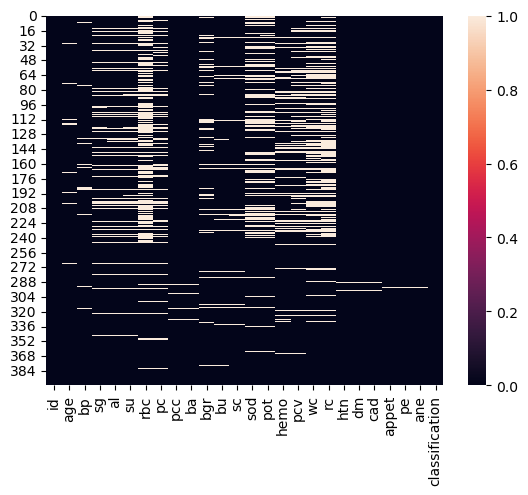

In [7]:
snp.heatmap(df.isnull())

In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [10]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
#using standard scaler
scaler=StandardScaler()
df[num_col]=scaler.fit_transform(df[num_col])
df[num_col]

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,-1.727726,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-0.341498,-0.424804,-0.326574,NaN,NaN,0.988022
1,-1.719066,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,-0.781687,-0.396338,NaN,NaN,-0.421688
2,-1.710406,0.613295,0.258373,-1.297699,0.727772,2.323069,3.473064,-0.087748,-0.221928,NaN,NaN,-1.006202
3,-1.701745,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,-0.392022,-0.028268,0.126891,-2.552778,-0.667102,-0.456071
4,-1.693085,-0.028189,0.258373,-1.297699,0.727772,-0.410106,-0.530963,-0.623073,-0.291692,NaN,NaN,-0.318538
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.693085,0.205078,0.258373,0.454071,-0.752868,-0.410106,-0.101509,-0.167055,-0.448661,1.200069,0.085536,1.091172
396,1.701745,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,-0.922524,-0.523939,-0.326574,0.334027,-0.353503,1.366237
397,1.710406,-2.302541,0.258373,0.454071,-0.752868,-0.410106,-0.606749,-0.623073,-0.431220,-0.050880,-0.071263,1.125555
398,1.719066,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,-0.429915,-0.147229,-0.361456,-0.243334,0.085536,0.575424


In [28]:
outlier={}
for col in num_col:
    Q1=df[num_col].quantile(0.25)
    Q3=df[num_col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=df[num_col][ (df[num_col] <lower_bound) | (df[num_col] > upper_bound)]
print("Outlier data\n")
outlier

Outlier data



,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2.594124,-1.936857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2.323069,3.473064,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,-2.173584,NaN,NaN,NaN,NaN,NaN,-2.552778,-0.667102,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


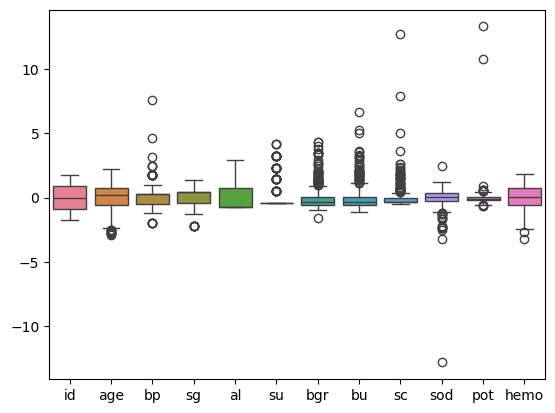

In [29]:
snp.boxplot(df[num_col])
plt.show()

In [14]:
df[num_col].isnull().sum()

id       0
age      9
bp      12
sg      47
al      46
su      49
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64

In [15]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
impute_median=SimpleImputer(strategy='median')
impute_median

SimpleImputer(strategy='median')

In [18]:
df[num_col]=impute_median.fit_transform(df[num_col])

In [19]:
df[num_col].isnull().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [20]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode

SimpleImputer(strategy='most_frequent')

In [22]:
df[cat_col]=impute_mode.fit_transform(df[cat_col])

In [23]:
df[cat_col].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [24]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [25]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    float64
 1   age     400 non-null    float64
 2   bp      400 non-null    float64
 3   sg      400 non-null    float64
 4   al      400 non-null    float64
 5   su      400 non-null    float64
 6   bgr     400 non-null    float64
 7   bu      400 non-null    float64
 8   sc      400 non-null    float64
 9   sod     400 non-null    float64
 10  pot     400 non-null    float64
 11  hemo    400 non-null    float64
dtypes: float64(12)
memory usage: 37.6 KB


In [26]:
encoded=OneHotEncoder(sparse_output=False)
encoded_df=encoded.fit_transform(df[cat_col])
encoded_col_names = encoded.get_feature_names_out(cat_col)
encoded_df = pd.DataFrame(encoded_df, columns=encoded_col_names)

# Reset index to match the original DataFrame if needed
encoded_df.index = df.index
encoded_df

,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,pcv_\t43,pcv_\t?,...,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_ckd\t,classification_notckd
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
396,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
397,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
398,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
df=pd.concat([df,encoded_df],axis=1)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_ckd\t,classification_notckd
0,-1.727726,-0.203139,0.258373,0.454071,-0.012548,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.719066,-2.594124,-1.936857,0.454071,2.208413,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.710406,0.613295,0.258373,-1.297699,0.727772,2.323069,normal,normal,notpresent,notpresent,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-1.701745,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,normal,abnormal,present,notpresent,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,-1.693085,-0.028189,0.258373,-1.297699,0.727772,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.693085,0.205078,0.258373,0.454071,-0.752868,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
396,1.701745,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
397,1.710406,-2.302541,0.258373,0.454071,-0.752868,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
398,1.719066,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,normal,normal,notpresent,notpresent,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
